# **Network 2 - Erdos-Renyi model**

In [13]:
import networkx as nx
import numpy as np
import pylab as plt 
import collections
import matplotlib.pyplot as plt

N = 620  # Number of nodes
L = 2102  # Number of edges

# Calculate probability p for an edge to exist between any two nodes
p = (2 * L) / (N * (N - 1))

# Generate the Erdős-Rényi graph
G = nx.erdos_renyi_graph(N, p)

In [14]:
N = G.number_of_nodes()
L = G.number_of_edges()
print("Number of nodes: ", N) 
print("Number of links: ", L) 
print() 

Number of nodes:  620
Number of links:  2076



**1. Description of the network**
* Erdos-Renyi model random network
* Type: undirected network
* N = 620 nodes
* L = 2076 edges

**2 Network properties**

The network is connected, so it has only 1 connected component
* Average degree: 6.69
* Size of the largest connected component: 620
* Diameter: 7
* Average shortest path length: 3.59604
* Average clustering coefficient: 0.00863

In [15]:
degrees = [G.degree[node] for node in G]

kmin = np.min(degrees)
kmax = np.max(degrees)
kavg = np.mean(degrees)

print("Average degree=", kavg)
print("Min degree=", kmin)
print("Max degree=", kmax)

Average degree= 6.696774193548387
Min degree= 1
Max degree= 16


=> narrow degree distribution, mean (6.69) is approx in the middle of the range (1 to 16). It indicates a random network.

In [16]:
nx.is_connected(G)

True

In [17]:
diameter = nx.diameter(G)
print("Diameter of G:", diameter)

nx.shortest_path(G)
average_shortest_path_length = nx.average_shortest_path_length(G)
print("Average shortest path length:", average_shortest_path_length)

average_clustering_coefficient = nx.average_clustering(G)
print("Average clustering coefficient:", average_clustering_coefficient)

edge_density = nx.density(G) # no of edges / maximum possible edges
print("Edge density:", edge_density)

Diameter of G: 7
Average shortest path length: 3.59604460889051
Average clustering coefficient: 0.008639389284550571
Edge density: 0.010818698212517588


**3. Plots**
* degree distribution
* clustering coefficient distribution
* betweenness centrality distribution 
* connected components size distribution

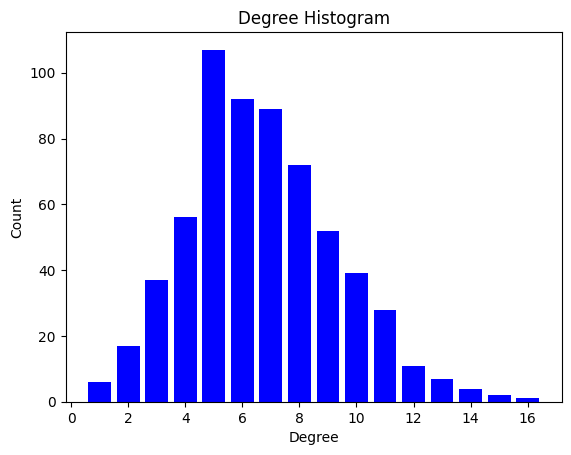

In [18]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

**Degree Histogram Analysis**
* the degree of most nodes is in the vicinity of k
* distribution may suggest binomial

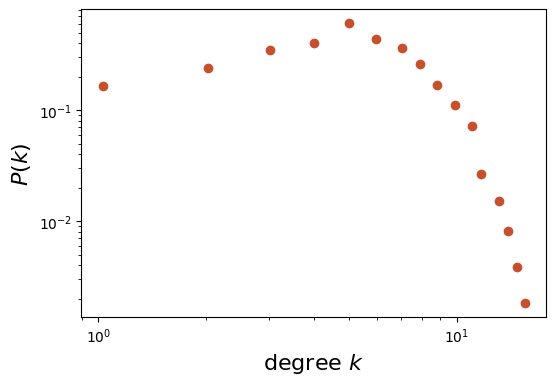

In [19]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=50)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none', color='#c7502c')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()


**Log Log Plot Analysis**
* from earlier we know that the avg degree is about in the middle
* it appears to have a concave downward shape. The tail follows almost a straight line, an indication of a power-law distribution, but the initial slope is completely different (we can observe the threshold phenomena).

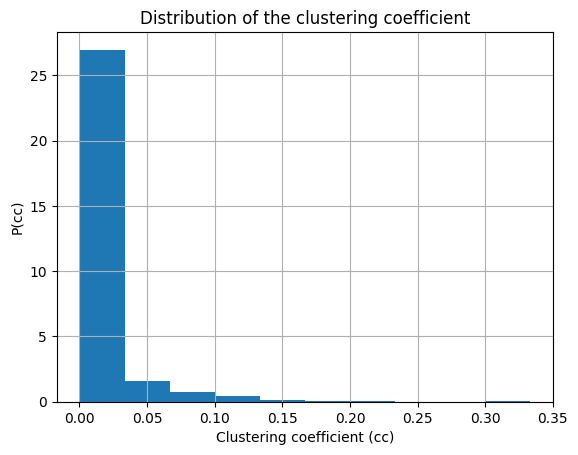

In [20]:
cc = nx.clustering(G)
vcc = []
# clustering coeff for each node in the network
for n in G.nodes():
    vcc.append(nx.clustering(G, n))
vcc = np.array(vcc)

plt.hist(cc.values(), bins=10, density=True)
plt.grid(True)
plt.title("Distribution of the clustering coefficient")
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")
plt.show()

**Clustering Coeff Plot Analysis**

* the nodes with a clustering coefficient of 0 do not form triangles with their neighbors 
* the distribution is quite skewed, with a large number of nodes having a low clusering coefficient

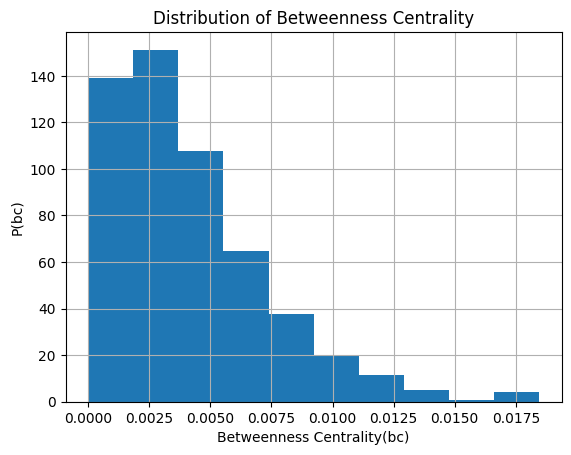

In [21]:
betweenness_dict = nx.betweenness_centrality(G) 
betweenness_values = list(betweenness_dict.values()) 

plt.hist(betweenness_values, bins=10, density=True) 
plt.title("Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality(bc)")
plt.ylabel("P(bc)")
plt.grid(True)
plt.show()

**Betweenness Centrality Plot Analysis**

* distribution is quite skewed, with a large number of nodes having a low betweenness centrality value, which is typical for many real-world networks. The tail is long, extending towards the higher values. 
* moste nodes have a low betweenness centrality, which is expected from a random, non-structured network.

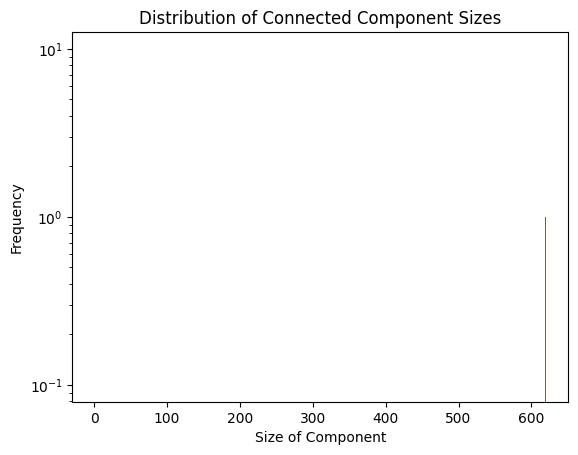

In [22]:
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)
component_sizes = [len(c) for c in connected_components]

plt.hist(component_sizes, bins=range(1, max(component_sizes)+1), density=True)
plt.title("Distribution of Connected Component Sizes")
plt.xlabel("Size of Component")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

**Connected Component Plot Analysis**
* the network has only one connected component, so we see only one bar on the plot
* this is not meaningful for our network


**4. Most important nodes according to different measures**



In [23]:
degrees = dict(G.degree())

# Node with maximum degree
max_degree_node = max(degrees, key=degrees.get)

# Node with maximum clustering coefficient
clustering = nx.clustering(G)
max_clustering_node = max(clustering, key=clustering.get)

# Node with the highest degree centrality
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)

# Node with the highest betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Node with the highest closeness centrality
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)

# Node with the highest eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
print(f"Node with the highest degree: {max_degree_node} (Degree: {degrees[max_degree_node]})")
print(f"Node with the highest clustering coefficient: {max_clustering_node} (Clustering Coefficient: {clustering[max_clustering_node]})")
print(f"Node with the highest degree centrality: {max_degree_node} (Degree Centrality: {degree_centrality[max_degree_node]})")
print(f"Node with the highest betweenness centrality: {max_betweenness_node} (Betweenness Centrality: {betweenness_centrality[max_betweenness_node]})")
print(f"Node with the highest closeness centrality: {max_closeness_node} (Closeness Centrality: {closeness_centrality[max_closeness_node]})")
print(f"Node with the highest eigenvector centrality: {max_eigenvector_node} (Eigenvector Centrality: {eigenvector_centrality[max_eigenvector_node]})")

Node with the highest degree: 157 (Degree: 16)
Node with the highest clustering coefficient: 442 (Clustering Coefficient: 0.3333333333333333)
Node with the highest degree centrality: 157 (Degree Centrality: 0.025848142164781908)
Node with the highest betweenness centrality: 235 (Betweenness Centrality: 0.018454451901267613)
Node with the highest closeness centrality: 6 (Closeness Centrality: 0.32960596379126733)
Node with the highest eigenvector centrality: 6 (Eigenvector Centrality: 0.11622178070353409)


* node 157 seems to be popular in terms of direct interactions, as it has the highest degree and also highest degree centrality.
* node 6 can interact the quickest with all other nodes in the network (well-positioned), and it is also connected to the most influential nodes, because it has the highest eigenvector centrality.

**5. Visualization of the network**

- **Basic Network Visualization**: initial exploration of the network to understand its general structure and connectivity
- **Circular Layout Visualization**: circular layout, useful for spotting symmetries
- **Network Visualization with Node Degree Size**: useful for quickly identifying important nodes or hubs within the network
- **Community Detection Visualization**: segregates communities within the network
- **Betweenness Centrality Visualization**: emphasizes nodes that serve as critical connectors or bridges within the network

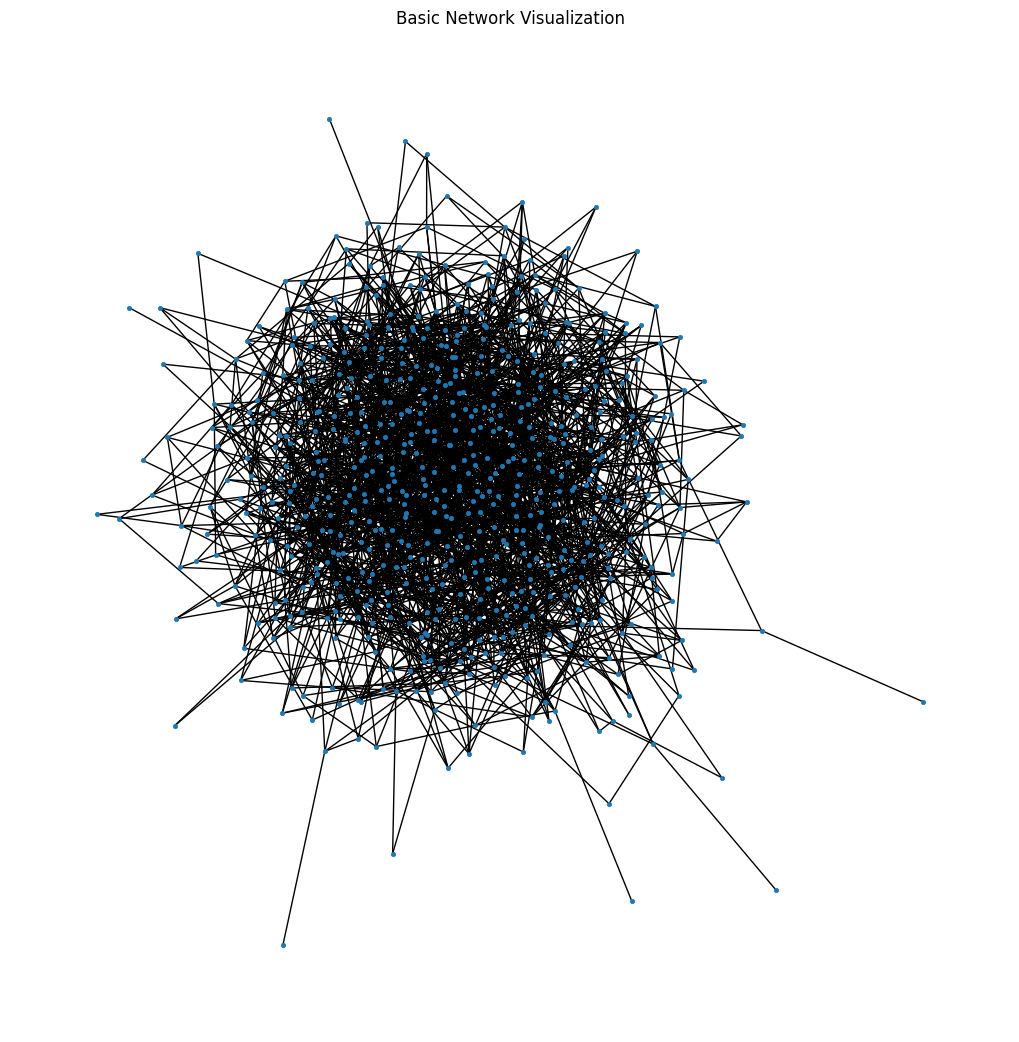

In [24]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=False, node_size=10, linewidths=0.5)
plt.title("Basic Network Visualization")
plt.show()

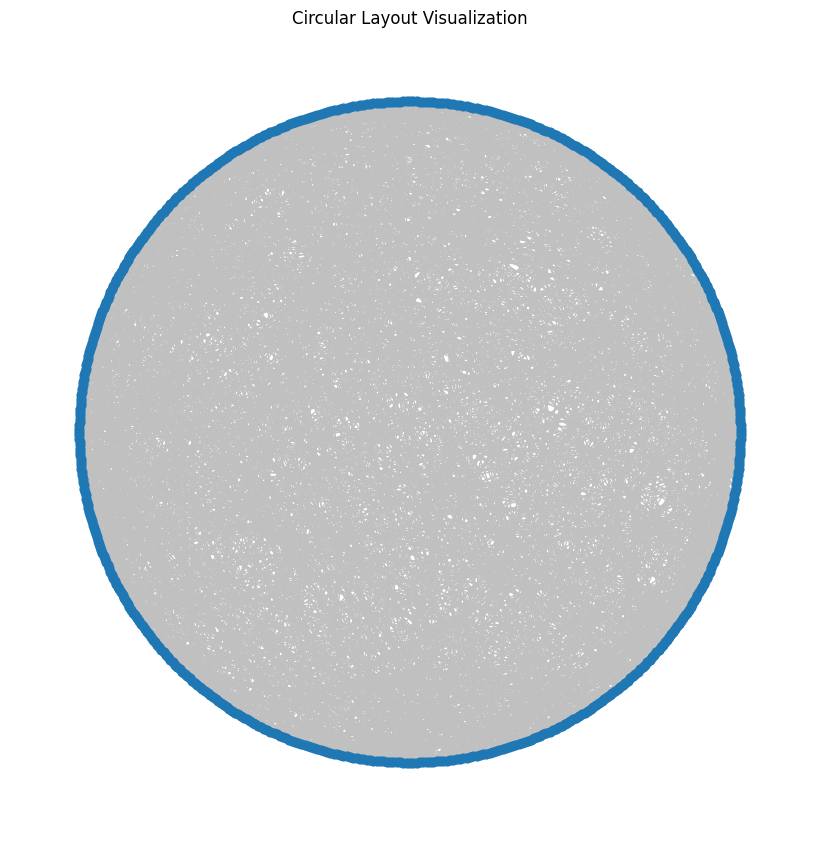

In [25]:
fig = plt.figure(figsize=(8, 8))
nx.draw_circular(G, node_size=40, with_labels=False, edge_color='silver')
plt.title("Circular Layout Visualization")
plt.show()

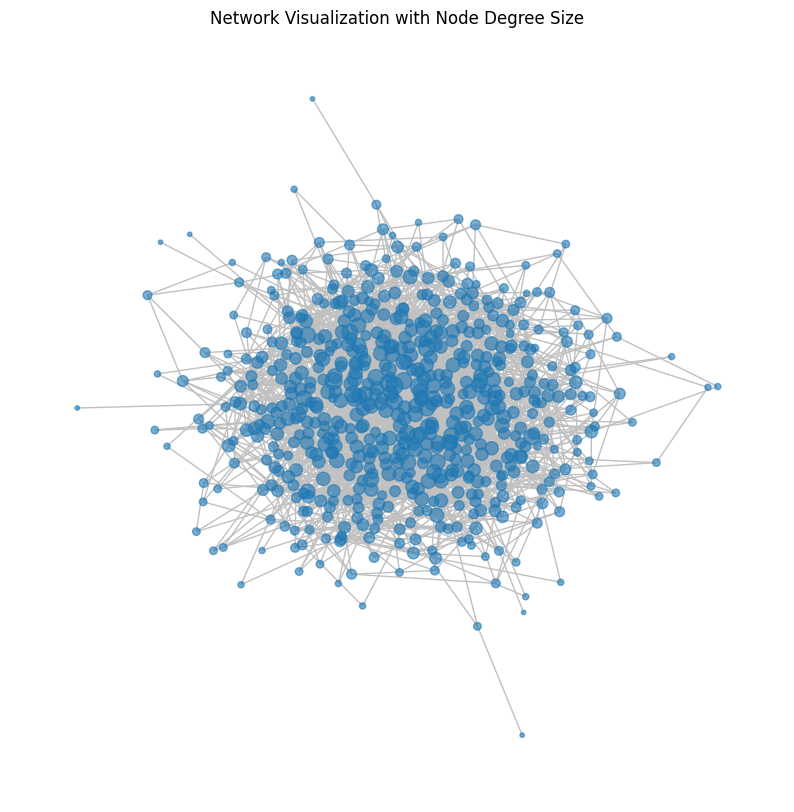

In [26]:
node_degree = dict(G.degree())

plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=[v * 10 for v in node_degree.values()], alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color='silver')

plt.axis('off')
plt.title("Network Visualization with Node Degree Size")
plt.show()

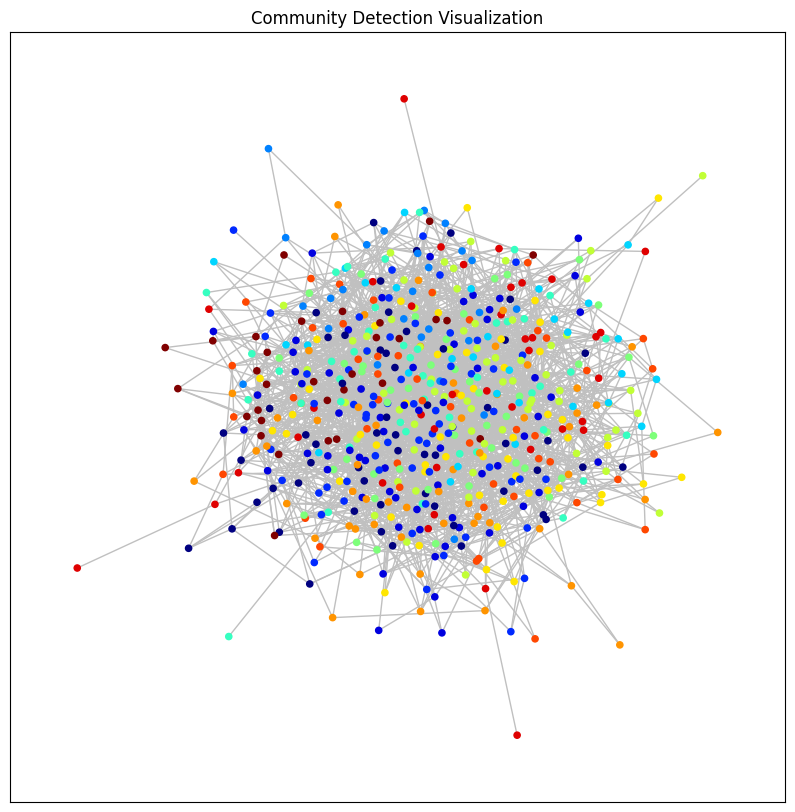

In [27]:
import community as community_louvain

partition = community_louvain.best_partition(G)
community_colors = [partition[node] for node in G.nodes()]

layout = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 10))

nx.draw_networkx(G, pos=layout, node_color=community_colors, with_labels=False,
                 node_size=20, edge_color="silver", cmap=plt.cm.jet)
plt.title("Community Detection Visualization")
plt.show()


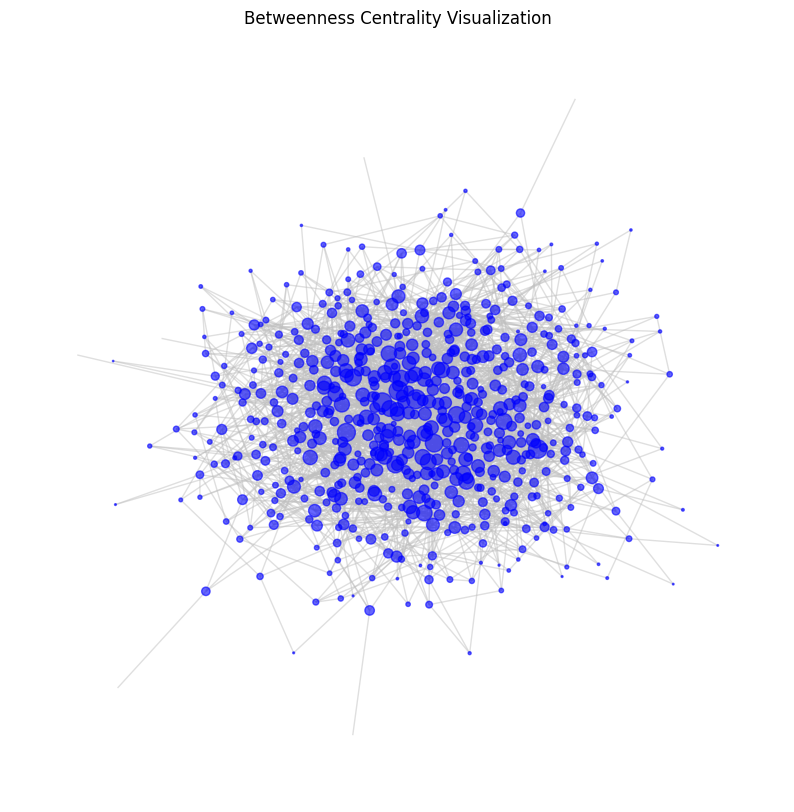

In [28]:
betweenness = nx.betweenness_centrality(G)
node_size = [v * 10000 for v in betweenness.values()]

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color='silver', alpha=0.5)

plt.title("Betweenness Centrality Visualization")
plt.axis('off') 
plt.show()